In [1]:
from datetime import date, timedelta
import pandas as pd
import requests
import io

def singleStock(stock, startDate=(2016,1,1), endDate=None):
    startDate = date(*startDate)
    if endDate == None:
        endDate = date.today() - timedelta(1)
    else:
        endDate = date(*endDate)
    stock_url = "http://finance.google.com/finance/historical?q=" + stock +"&startdate=" + startDate.strftime("%B") +"+" + str(startDate.day) + "+" + str(startDate.year) +"&enddate=" + endDate.strftime("%B") + "+" + str(endDate.day) + "+" + str(endDate.year) + "&output=csv"
    raw_response = requests.get(stock_url).content
    stock_data = pd.read_csv(io.StringIO(raw_response.decode('utf-8')))
    stock_data.Date = pd.to_datetime(stock_data.Date)
    return stock_data

def multipleStock(stocks, startDate=(2016,1,1), endDate=None):
    startDate = date(*startDate)
    if endDate == None:
        endDate = date.today() - timedelta(1)
    else:
        endDate = date(*endDate)
    dates = pd.date_range(str(startDate), str(endDate), name='Date').to_series()
    output = dates.to_frame()
    for stock in stocks:
        stock_url = "http://finance.google.com/finance/historical?q=" + stock +"&startdate=" + startDate.strftime("%B") +"+" + str(startDate.day) + "+" + str(startDate.year) +"&enddate=" + endDate.strftime("%B") + "+" + str(endDate.day) + "+" + str(endDate.year) + "&output=csv"
        raw_response = requests.get(stock_url).content
        stock_data = pd.read_csv(io.StringIO(raw_response.decode('utf-8')))
        stock_data.Date = pd.to_datetime(stock_data.Date)
        columnNames = output.columns.tolist()
        columnNames.append(stock)
        output = pd.merge(output, stock_data[['Date', 'Close']], 'left')
        output.columns = columnNames
    output = output.fillna(method = 'ffill')
    return output


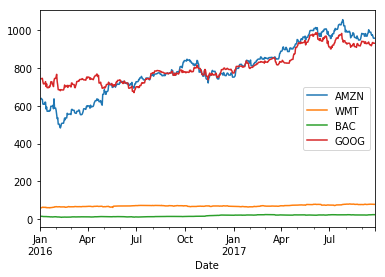

In [2]:
import matplotlib.pyplot as plt

stocks = ['AMZN', 'WMT', 'BAC', 'GOOG']
sample = multipleStock(stocks)


plot = sample.plot(x='Date', y='AMZN')
plot = sample.plot(x='Date', y='WMT', ax=plot)
plot = sample.plot(x='Date', y='BAC', ax=plot)
plot = sample.plot(x='Date', y='GOOG', ax=plot)
plt.show()